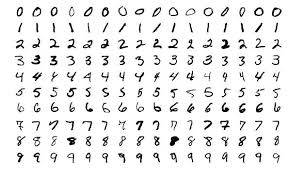

    In this notebook, we are going to dive into the MNIST (Modified National Institute of Standards and Technology) database.MNIST is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).
- **Our task** is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively using a CNN that will be able to recognize the handwritten digits. CNN is a type of deep neural network commonly used for computer vision applications. So we will build an image classifier TensorFlow’s Keras API on the MNIST dataset. Keras is a Python library and is highly recommended for beginners due to its smooth learning curve. It is very commonly used in implementing neural networks.

# Importing Packages  and Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
 # To load the MNIST digit dataset from tensorflow library and keras module
from tensorflow.keras.datasets.mnist import load_data   

In [3]:
(X_train, y_train) , (X_test, y_test) = load_data()      # Train-test splitting 

The load_data() function loads the MNIST dataset and is used to split the data loaded from the MNIST dataset into training data (X_train, y_train) and test data (X_test, y_test). X_train and X_test data are 3D tensors containing the pixel values of the images. y_train and y_test data are 1D tensors containing the correct class labels of the images.

In [4]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


Prints the shape of the x_train and y_train data on the screen. The expression x_train.shape returns the shape of the training data as a 3D tensor. The first dimension of this tensor is the number of training samples. The second and third dimensions are the height and width of the images. y_train.shape returns the shape of the y_train data as a 1-dimensional tensor. The dimension of this tensor is the number of training samples. Each element contains the correct class label for the matching instance. The output of this code specifies the shape of the training data and the shape of its labels.

In [5]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


The X_test tensor contains images of test samples from the MNIST dataset. Since these images are in black and white (grayscale), each one has only one channel and therefore has no third dimension. The X_test tensor is therefore of the form (10000, 28, 28), i.e. 10,000 test samples each contain a black and white image of size 28x28.

However, if the images were colour (RGB), each pixel would have red, green and blue channels. In this case, the X_test tensor would have the third dimension and its shape would be (10000, 28, 28, 28, 3).

In [6]:
# Checking the shape of one image
X_train[33].shape

(28, 28)

# EDA

In [7]:
X_train[33] # gives the numerical values of image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

there are 28 rows and 28 columns which expresses the witdh and height of the picture

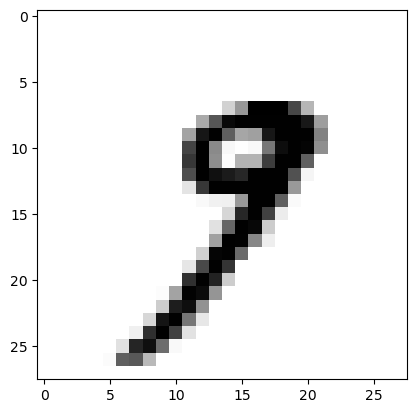

In [8]:
#visualize the matrix above
plt.imshow(X_train[33], cmap= plt.cm.binary); 
#The cmap= plt.cm.binary parameter specifies a colour map used to obtain a black and white image.

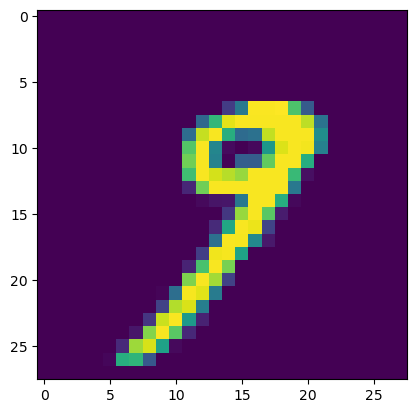

In [9]:
plt.imshow(X_train[33]);

Let's look some of the data pictures

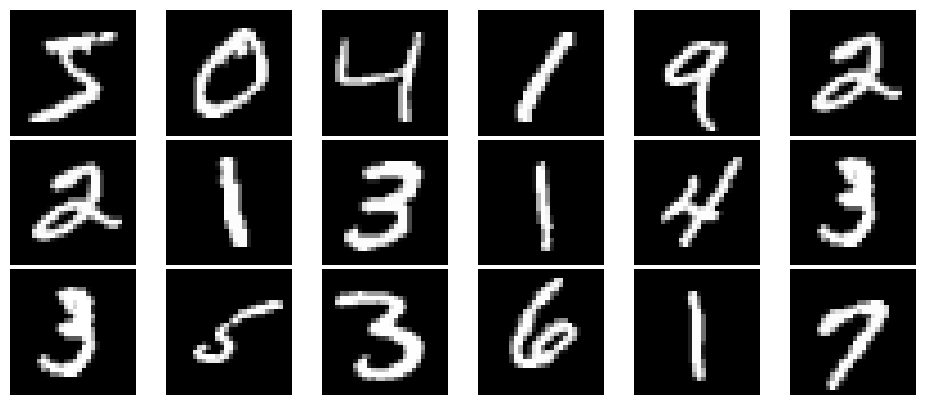

In [10]:
num_rows, num_cols = 3, 6                                       # We selected 3 rows and 6 columns from the data.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

Let's look some of the data pictures and see what corresponds to them

C:\Users\MASTER\AppData\Local\Temp\ipykernel_12028\3924017328.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


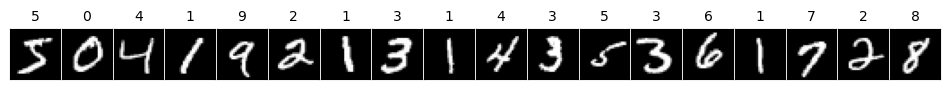

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=18, figsize=(12,5),
                         gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                         squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)
    
plt.tight_layout()
plt.show()

# Data Preprocessing

## Scaling

- Scaling is necessary in MNIST dataset for Numerical Stability,Feature Importance, Better Performance,convergence speed and optimization.

In [12]:
X_train[33].min()

0

In [13]:
X_train[33].max()

255

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Let's convert the pixel values of images from the range 0-255 to the range 0-1.
This helps the CNN learn faster and perform better.Then control again.

In [15]:
X_train[33].min()

0.0

In [16]:
X_train[33].max()

1.0

In [17]:
X_train[33]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Reshaping to Tensor form

In [18]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

<div style="background-color: #ADD8E6; padding: 10px; border-radius: 5px;">
    <p style="color: #000080;">Each image in the MNIST dataset has a size of 28x28 pixels. However, since the data used as input for the CNN model must be in the form of a 3D tensor, each image is converted into a tensor of size 28x28x1.</p>
</div>

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

If X_train was a single 28x28 matrix (shape=(60000, 28, 28)), it would not be possible to fit it into a CNN model because CNN models expect a 4-dimensional data structure. Therefore, by reshaping, X_train was transformed into a 4-dimensional data structure (60000, 28, 28, 1).

In [20]:
X_train[99].shape

(28, 28, 1)

## Encoding

In [21]:
y_train[99]

1

In [22]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

The function to_categorical converts labels(y_train and y_test) into a one-hot encoded format in multi-class classification problems.  
Class labels are encoded as a 10-dimensional vector.

In [23]:
Y_train[99]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

For example, if the label of an image is "1", this label is converted to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] using the to_categorical() function. Here, the number "1" is located at index 2 and this index is encoded with 1, while the other indexes are encoded with 0.

In [24]:
Y_train[66]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# MODELLING

## Model Architecture

In [25]:
model = Sequential()

#CNN 
#Convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(28, 28, 1))) # if we use padding='valid' we would have lost shape of the images
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#New Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#ANN
#Fully connected layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation='softmax'))

#model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\MASTER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Model Summary and Fitting

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,282 (227.66 KB)

 Trainable params: 57,834 (225.91 KB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
early_stop = EarlyStopping(monitor="val_accuracy",
                           mode='auto',
                           verbose=1,
                           patience=50)

history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                    validation_split=0.1,
                    batch_size=512, epochs=300,
                    callbacks=[early_stop])

Epoch 1/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.6862 - loss: 1.0181 - val_accuracy: 0.1135 - val_loss: 4.7626
Epoch 2/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.9526 - loss: 0.1554 - val_accuracy: 0.1135 - val_loss: 5.0980
Epoch 3/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 141ms/step - accuracy: 0.9682 - loss: 0.1050 - val_accuracy: 0.1458 - val_loss: 3.4629
Epoch 4/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.9741 - loss: 0.0813 - val_accuracy: 0.6642 - val_loss: 0.9166
Epoch 5/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 149ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9575 - val_loss: 0.1338
Epoch 6/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.9828 - loss: 0.0584 - val_accuracy: 0.9869 - val_loss: 0.0398
Epoch 7/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.9827 - loss: 0.0545 - val_accuracy: 0.9910 - val_loss: 0.0309
Epoch 8/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.9833 -

118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.9947 - loss: 0.0154 - val_accuracy: 0.9938 - val_loss: 0.0224
Epoch 51/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9931 - val_loss: 0.0241
Epoch 52/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.9934 - val_loss: 0.0228
Epoch 53/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9931 - val_loss: 0.0250
Epoch 54/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9931 - val_loss: 0.0225
Epoch 55/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9938 - val_loss: 0.0217
Epoch 56/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9936 - val_loss: 0.0227
Epoch 57/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9955 - loss

118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9928 - val_loss: 0.0215
Epoch 100/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9942 - val_loss: 0.0228
Epoch 101/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.9967 - loss: 0.0087 - val_accuracy: 0.9933 - val_loss: 0.0284
Epoch 102/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9969 - loss: 0.0100 - val_accuracy: 0.9932 - val_loss: 0.0245
Epoch 103/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9971 - loss: 0.0087 - val_accuracy: 0.9941 - val_loss: 0.0241
Epoch 104/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9921 - val_loss: 0.0272
Epoch 105/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.9965 - loss: 0.0094 - val_accuracy: 0.9936 - val_loss: 0.0261
Epoch 106/300
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.9964

In [28]:
model.history.history        # Loss and accuracy history of the model in education 

{'accuracy': [0.8419833183288574,
  0.9572833180427551,
  0.9696000218391418,
  0.9759833216667175,
  0.9794166684150696,
  0.9812166690826416,
  0.982783317565918,
  0.984333336353302,
  0.9859499931335449,
  0.9865666627883911,
  0.9860833287239075,
  0.9880333542823792,
  0.9880499839782715,
  0.9892333149909973,
  0.9891999959945679,
  0.989216685295105,
  0.9896500110626221,
  0.9903166890144348,
  0.991100013256073,
  0.9913333058357239,
  0.991349995136261,
  0.9917833209037781,
  0.9922500252723694,
  0.9918500185012817,
  0.9917833209037781,
  0.9926666617393494,
  0.9923999905586243,
  0.9922833442687988,
  0.9925333261489868,
  0.9930166602134705,
  0.9924833178520203,
  0.9929333329200745,
  0.9932166934013367,
  0.9935500025749207,
  0.9937999844551086,
  0.9940166473388672,
  0.9942666888237,
  0.9937000274658203,
  0.9940500259399414,
  0.9943166375160217,
  0.9944000244140625,
  0.9938833117485046,
  0.9939166903495789,
  0.9945499897003174,
  0.9947999715805054,
  0.99

In [29]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.841983,0.505650,0.1135,4.762615
1,0.957283,0.139096,0.1135,5.098036
2,0.969600,0.098334,0.1458,3.462918
3,0.975983,0.076946,0.6642,0.916589
4,0.979417,0.065951,0.9575,0.133834


In [30]:
summary.tail()

,accuracy,loss,val_accuracy,val_loss
131,0.997017,0.008852,0.9934,0.026435
132,0.997183,0.008354,0.9934,0.024369
133,0.997333,0.007699,0.9931,0.026773
134,0.997300,0.007585,0.9946,0.021528
135,0.997617,0.007086,0.9931,0.028541


In [31]:
model.evaluate(X_test,Y_test)[1] #to see test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9911 - loss: 0.0359


0.9930999875068665

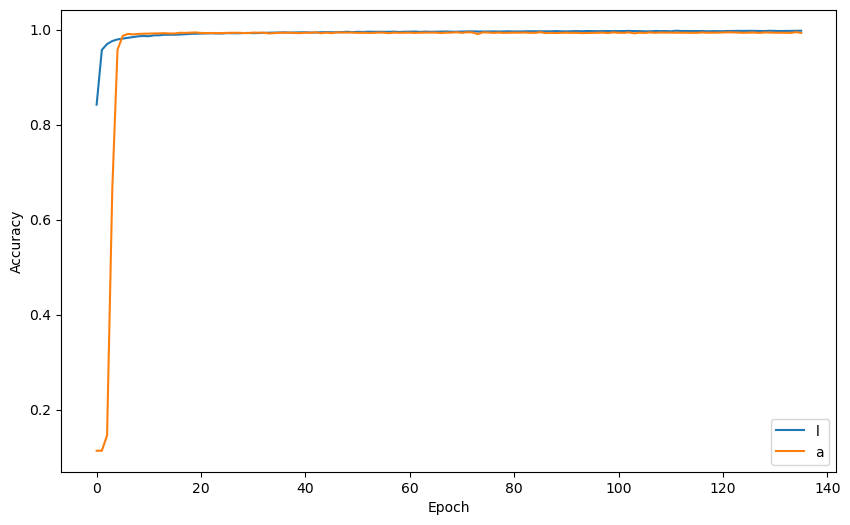

In [32]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

(0.95, 1.0)

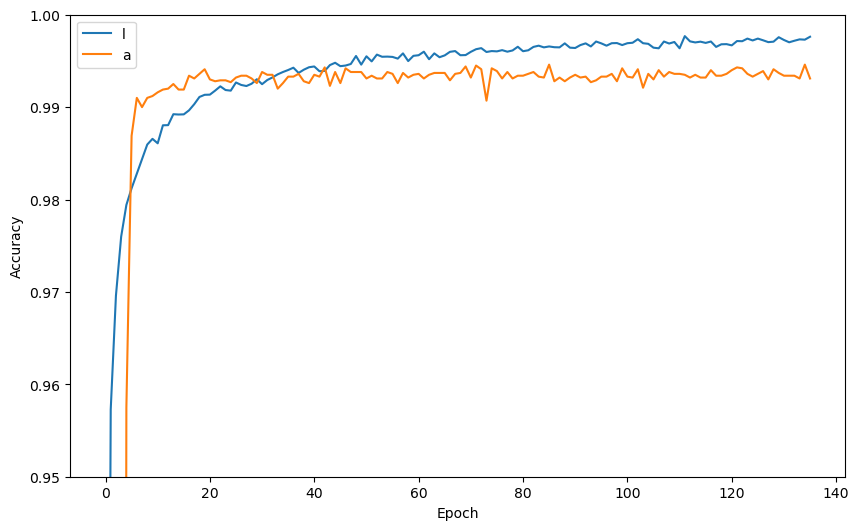

In [33]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

plt.ylim(0.95,1) #in order to zoom in

(0.0, 0.1)

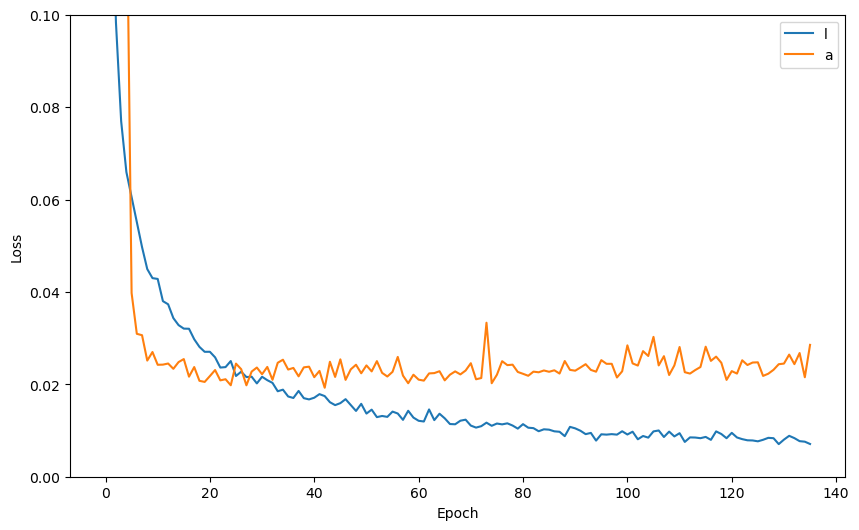

In [35]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              # DataFrame' den cekilen loss degerleri
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

plt.ylim(0,0.1) #in order to zoom in

In [36]:
preds = model.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.9710323e-12, 1.5351656e-08, 1.4689031e-11, ..., 1.0000000e+00,
        1.5976345e-13, 5.7481231e-10],
       [2.6518817e-11, 2.3053412e-10, 1.0000000e+00, ..., 2.7663275e-12,
        9.1944654e-14, 3.9297024e-13],
       [3.4908812e-12, 1.0000000e+00, 8.6631944e-13, ..., 3.3340474e-12,
        2.5670618e-12, 4.6406723e-14],
       ...,
       [4.1968143e-16, 7.3070305e-10, 8.4742453e-15, ..., 1.1935186e-13,
        3.2501141e-11, 7.4981532e-14],
       [5.8021164e-11, 2.2421114e-13, 2.0231424e-13, ..., 1.0032799e-12,
        3.8711110e-09, 1.5306849e-10],
       [2.8793732e-09, 2.5186977e-12, 3.0663852e-10, ..., 1.8259640e-15,
        3.9741843e-12, 3.0129859e-12]], dtype=float32)

In [38]:
preds[33]

array([1.00552100e-09, 2.80135077e-06, 8.89512108e-08, 1.48195004e-14,
       9.99990463e-01, 1.07595035e-11, 6.53267489e-06, 2.61767524e-10,
       9.03031664e-13, 3.41096969e-13], dtype=float32)

In [41]:
Y_test[33]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [42]:
predictions= np.argmax(preds, axis=1)

The variable predictions is assigned the indices of the class with the highest probability in the numpy array preds. The axis=1 parameter specifies that argmaxing is done by columns (i.e. comparing the class probabilities in each instance). As a result, the predictions array contains the indices of the class with the highest probability for each instance in the preds array.

In [43]:
len(predictions)

10000

In [46]:
print(predictions[:50])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


# EVALUATION

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, predictions))

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    5 1022    0    0    0    0    5    0    0]
 [   0    1    0 1003    0    5    0    0    0    1]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    1    0    3    0  886    1    0    0    0]
 [   1    4    0    0    2    1  949    0    1    0]
 [   0    4    3    0    0    0    0 1021    0    0]
 [   2    2    1    1    0    0    0    0  965    3]
 [   0    1    0    0    8    2    0    7    0  991]]


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028524428606033325
Test accuracy: 0.9930999875068665


# Prediction

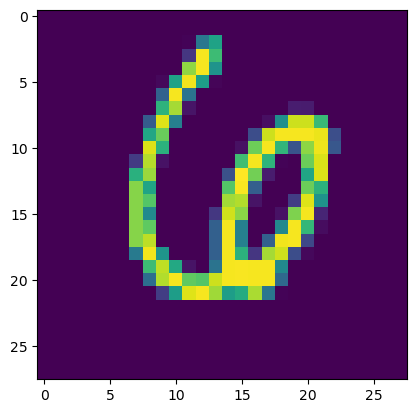

In [51]:
number_test = X_test[66]
plt.imshow(number_test); 

In [52]:
np.argmax(model.predict(number_test.reshape(1,28,28,1)), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([6], dtype=int64)